In [11]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14

# Step 1: Generate Data
np.random.seed(42)
n = 100  # Length of the time series
mu = 0  # Mean of the series
theta_true = [0.6, 0.3]  # coefficients guess

# Generate white noise
epsilon = np.random.normal(0, 1, n)

# Initialize the time series array
y = np.zeros(n)

# Generate the MA(2) process
for t in range(2, n):
    y[t] = mu + epsilon[t] + theta_true[0] * epsilon[t-1] + theta_true[1] * epsilon[t-2]

# Step 2: Define the Log-Likelihood Function
def log_likelihood(params, y):
    mu, theta1, theta2, sigma2 = params
    n = len(y)
    epsilon = np.zeros(n)
    
    for t in range(2, n):
        epsilon[t] = y[t] - (mu + theta1 * epsilon[t-1] + theta2 * epsilon[t-2])
    
    ll = - (n/2) * np.log(2 * np.pi * sigma2) - (1 / (2 * sigma2)) * np.sum(epsilon[2:] ** 2)
    return -ll  # Negative log-likelihood

# Step 3: Optimize the Log-Likelihood Function
# Initial parameter guesses: mu, theta1, theta2, sigma2
initial_params = [0, 0.1, 0.1, 1]
result = minimize(log_likelihood, initial_params, args=(y,), method='L-BFGS-B', 
                    bounds=[(None, None), (None, None), (None, None), (1e-6, None)])

# Extract estimated parameters
mu_est, theta1_est, theta2_est, sigma2_est = result.x
print(f"Estimated mu: {round(mu_est,4)}")
print(f"Estimated theta: [{round(theta1_est,4)}, {round(theta2_est,4)}]")
print(f"Estimated sigma^2: {round(sigma2_est,4)}")

Estimated mu: -0.1998
Estimated theta: [0.5846, 0.2979]
Estimated sigma^2: 0.8112


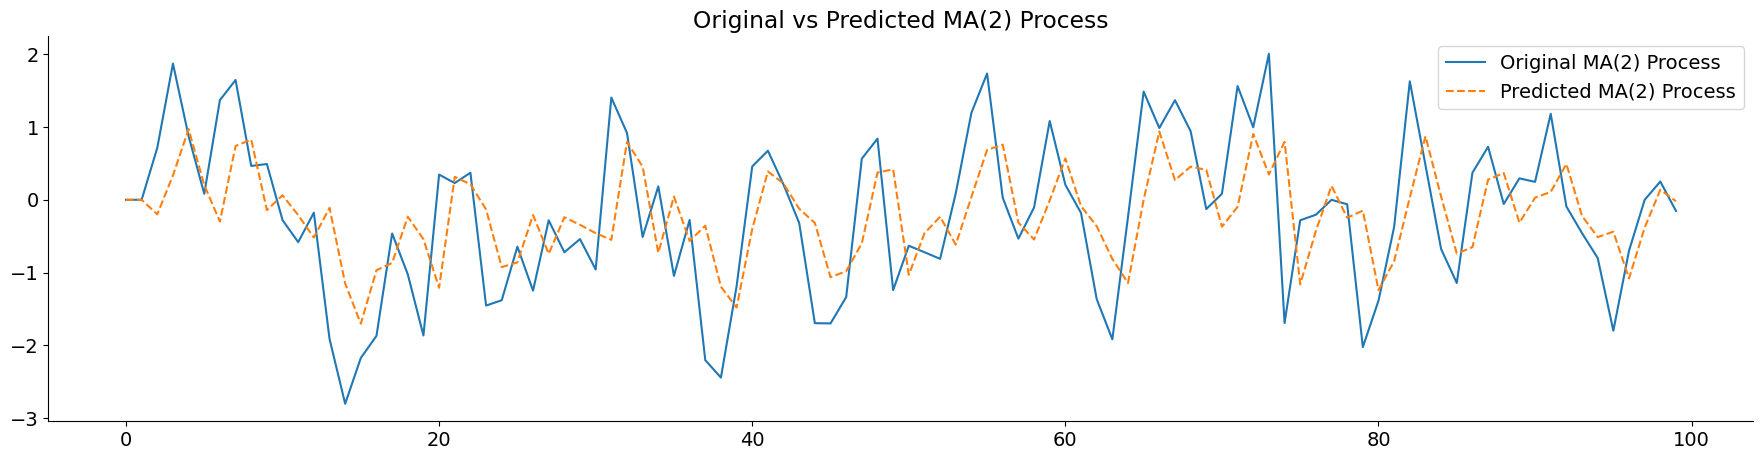

In [10]:
# Step 4: Define the MA Model for Prediction
def ma_predict(y, theta, mu=0):
    n = len(y)
    q = len(theta)
    epsilon = np.zeros(n)
    y_pred = np.zeros(n)

    # Predict the values using the MA model
    for t in range(q, n):
        y_pred[t] = mu + sum(theta[i] * epsilon[t-i-1] for i in range(q))
        epsilon[t] = y[t] - y_pred[t]

    return y_pred

# Step 5: Make Predictions
theta_est = [theta1_est, theta2_est]  # Estimated parameters
y_pred = ma_predict(y, theta_est, mu_est)

# Plot the original and predicted time series
plt.plot(y, label='Original MA(2) Process')
plt.plot(y_pred, label='Predicted MA(2) Process', linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Original vs Predicted MA(2) Process')
plt.legend()
plt.show()

The general formula for the Log-Likelihood function is:
     $$
     \text{LL}(\theta | \mathbf{x}) = \log L(\theta | \mathbf{x})
     $$

Certainly! Here's the Log-Likelihood function for a normal distribution :

$
\text{LL}(\mu, \sigma^2) = -\frac{n}{2} \log (2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2
$

Where:
- $ \mu $ is the mean of the normal distribution.
- $ \sigma^2 $ is the variance of the normal distribution.
- $ x_i $ represents the observed data points.
- $ n $ is the number of data points.

In [12]:
# Log-Likelihood function for a normal distribution
def log_likelihood(params, data):
    mu, sigma2 = params
    n = len(data)
    
    # Check for valid sigma2
    if sigma2 <= 0:
        return np.inf  # Return infinity if sigma2 is not positive

    # Compute the log-likelihood
    ll = -n/2 * np.log(2 * np.pi * sigma2) - np.sum((data - mu)**2) / (2 * sigma2)
    
    return -ll  # Return negative LL because we will use minimization

# Example usage
data = np.array([1.1, 2.3, 3.0, 4.5, 5.6])  # Example data
initial_params = [0, 1]  # Initial guesses for mu and sigma2

# Compute the log-likelihood for the given parameters
ll_value = log_likelihood(initial_params, data)
print(f"Log-Likelihood value: {ll_value}")


Log-Likelihood value: 38.14969266602336
